In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
data['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [6]:
def extract_brand_model(name):
    parts = name.split(maxsplit=1)
    brand = parts[0]
    model = parts[1] if len(parts) > 1 else ''
    return brand, model

In [7]:
data['brand'], data['model'] = zip(*data['name'].apply(extract_brand_model))

In [8]:
data.drop(columns=['name'], inplace=True)

In [9]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC
...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20 Magna 1.4 CRDi (Diesel)
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20 Magna 1.4 CRDi
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800 AC BSIII
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta 1.6 CRDi SX Option


In [10]:
data['year'] = 2023 - data['year']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   brand          4340 non-null   object
 8   model          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


<Axes: >

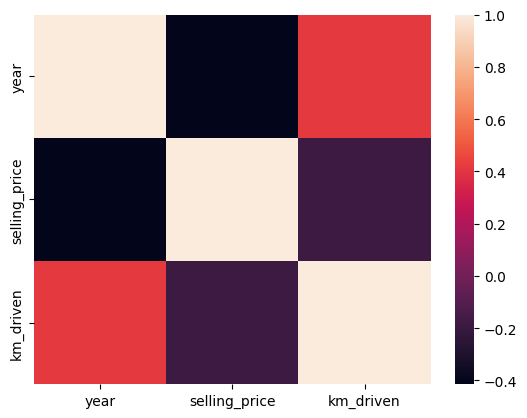

In [12]:
sns.heatmap(data[['year', 'selling_price','km_driven']].corr())

<Axes: xlabel='year', ylabel='selling_price'>

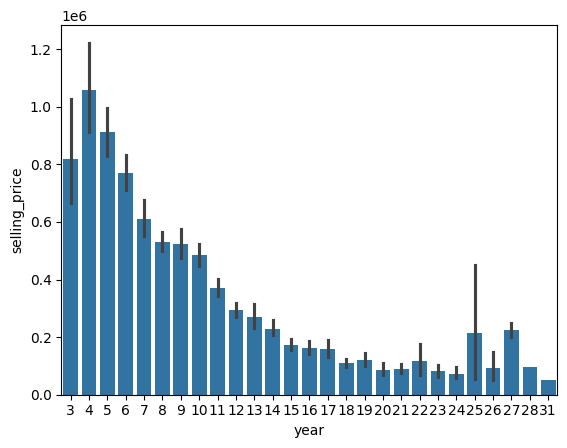

In [13]:
sns.barplot(x=data['year'], y=data['selling_price'])

<Axes: xlabel='fuel', ylabel='selling_price'>

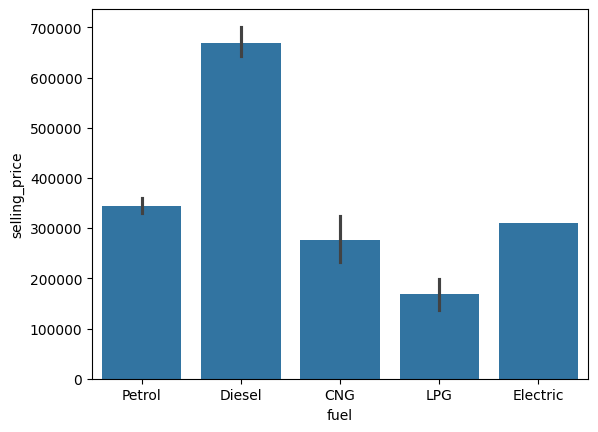

In [14]:
sns.barplot(x=data['fuel'], y=data['selling_price'])

In [15]:
data['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [16]:
data = data[data['fuel'] != 'Electric']

In [17]:
data['fuel'].value_counts()

fuel
Diesel    2153
Petrol    2123
CNG         40
LPG         23
Name: count, dtype: int64

In [18]:
def convert_fuel(text):
    if text == 'CNG' or text == 'LPG':
        return 'Others'
    else:
        return text

In [19]:
data['fuel'] = data['fuel'].apply(convert_fuel)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12764\2914817399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel'] = data['fuel'].apply(convert_fuel)


In [20]:
data['fuel'] = data['fuel'].map({'Diesel': 1, 'Petrol': 2, 'Others': 3})

C:\Users\ACER\AppData\Local\Temp\ipykernel_12764\155689044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel'] = data['fuel'].map({'Diesel': 1, 'Petrol': 2, 'Others': 3})


In [21]:
data.sample(7)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
897,10,450000,1000,1,Dealer,Manual,Second Owner,Renault,Duster 85PS Diesel RxL
1052,9,250000,50000,2,Individual,Manual,First Owner,Maruti,Alto 800 LXI Airbag
1924,11,185000,40000,1,Individual,Manual,First Owner,Tata,Indica Vista Quadrajet VX
846,8,400000,90000,2,Individual,Manual,First Owner,Maruti,Swift Dzire VXI
4,9,450000,141000,1,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC
3171,9,450000,260000,1,Individual,Manual,Second Owner,Maruti,Swift Dzire VDI
1056,8,320000,50000,1,Individual,Manual,Third Owner,Mahindra,Bolero Power Plus Plus AC BSIV PS


In [29]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [30]:
data['seller_type'] = data['seller_type'].map({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})

C:\Users\ACER\AppData\Local\Temp\ipykernel_12764\765656592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seller_type'] = data['seller_type'].map({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})


In [33]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
data['transmission'] = data['transmission'].map({'Manual': 1, 'Automatic': 2})

C:\Users\ACER\AppData\Local\Temp\ipykernel_12764\1405173013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission'] = data['transmission'].map({'Manual': 1, 'Automatic': 2})


In [36]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [37]:
data['owner'] = data['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

C:\Users\ACER\AppData\Local\Temp\ipykernel_12764\569512855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['owner'] = data['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
data = data[data['selling_price'] <= 8000000]

In [61]:
data = data[data['km_driven'] <= 800000]

<Axes: xlabel='selling_price', ylabel='Count'>

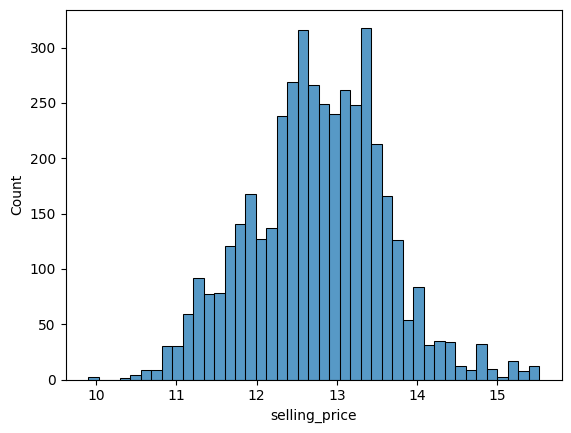

In [66]:
sns.histplot(np.log(data['selling_price']))

In [67]:
X = data[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
y = np.log(data['selling_price'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = lm.predict(X_test)

In [72]:
print('MAE :',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 Score: ',metrics.r2_score(y_test, y_pred))

MAE : 0.3700866370552291
RMSE : 0.47484588284260587
r2 Score:  0.6900422932148065


<Axes: xlabel='selling_price', ylabel='Count'>

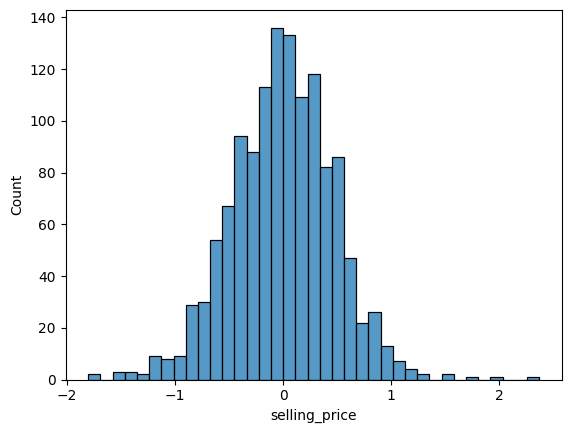

In [73]:
sns.histplot((y_test-y_pred))